In [1]:
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow as tf

import sys
sys.path.append('../')

from wavy import panel
from wavy import nn
from wavy import plot

In [2]:
df = pd.read_pickle('processed.pkl')

In [3]:
df.head(5)

LNC                                                    MAS  \
                 Open       High        Low      Close     Volume       Open   
Date                                                                           
2005-12-21  38.127885  39.324626  38.120589  39.207870  2190100.0  18.991695   
2005-12-22  39.185984  39.324630  38.879500  39.040039  1095500.0  19.085703   
2005-12-23  39.061931  39.397604  38.959771  39.324631   588800.0  18.954090   
2005-12-27  39.514374  39.514374  38.981676  39.237080   932700.0  18.929008   
2005-12-28  39.455973  39.696782  39.244353  39.310028   427200.0  18.853798   

                                                        ...       CSX  \
                 High        Low      Close     Volume  ...      Open   
Date                                                    ...             
2005-12-21  19.154659  18.903944  19.085712  1384200.0  ...  6.245725   
2005-12-22  19.298810  18.910202  18.929007  1576900.0  ...  6.381336   
2005-12-23  18.954090  18.684571  18.816196  2090500.0  ...  6.297691   
2005-12-27  18.991687  18.803650  18.847525  1609000.0  ...  6.520750   
2005-12-28  18.935281  18.747245  18.803656  2026300.0  ...  6.419358   

                                                            CI             \
                High       Low     Close     Volume       Open       High   
Date                                                                        
2005-12-21  6.399080  6.245725  6.362326  8358000.0  36.945102  37.462575   
2005-12-22  6.420626  6.361058  6.410487  5344800.0  37.409841  37.630677   
2005-12-23  6.520752  6.297691  6.468790  3630000.0  37.376876  37.432909   
2005-12-27  6.527087  6.369931  6.400348  4905000.0  37.195584  37.455973   
2005-12-28  6.459914  6.363592  6.419358  3578400.0  37.241735  37.449383   

                                             
                  Low      Close     Volume  
Date                                         
2005-12-21  36.895658  37.370289  2805900.0  
2005-12-22  37.073647  37.327442  2296800.0  
2005-12-23  36.905546  37.261517  1686000.0  
2005-12-27  36.961570  37.116482  1917900.0  
2005-12-28  37.109892  37.251621  1248900.0  

[5 rows x 2085 columns]

In [4]:
# xdata preprocessing

# df = df.pct_change().dropna()

In [5]:
timepanel = panel.from_data(df, lookback = 5, horizon = 1, gap = 0, assets = ['AAPL'], channels= ['High'])

In [6]:
timepanel.x.first

,AAPL
,High
Date,
2005-12-21,2.249430
2005-12-22,2.276323
2005-12-23,2.269293
2005-12-27,2.297408
2005-12-28,2.284574


In [7]:
timepanel.y.first

,AAPL
,High
Date,
2005-12-29,2.255848


In [8]:
timepanel.set_training_split()

In [9]:
timepanel.x.first

,AAPL
,High
Date,
2005-12-21,2.249430
2005-12-22,2.276323
2005-12-23,2.269293
2005-12-27,2.297408
2005-12-28,2.284574


In [10]:
timepanel.shape

100%|██████████| 3742/3742 [00:00<00:00, 116013.26it/s]


,size,assets,timesteps,channels
x,3742,1,5,1
y,3742,1,1,1


# Baseline

In [11]:
baseline = nn.Baseline(timepanel)

In [12]:
predicted = baseline.predict(include_gt=True)

In [13]:
# plot.predict_plot(predicted)

# BaseModel

In [14]:
basemodel = nn.DenseModel(timepanel, model_type="regression")

100%|██████████| 374/374 [00:00<00:00, 148001.67it/s]
2021-12-21 22:39:26.950054: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
basemodel.x_train.shape

(2695, 5, 1)

In [16]:
basemodel.model.build(input_shape=basemodel.x_train.shape)

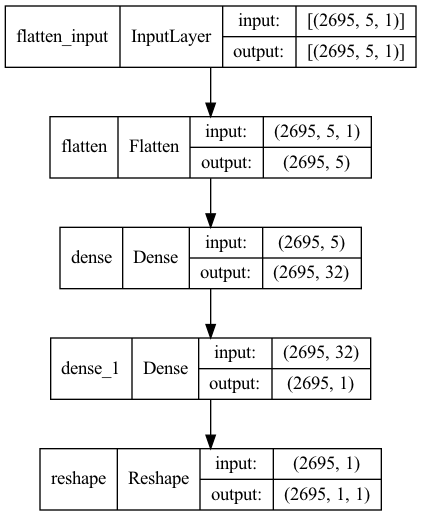

In [18]:
tf.keras.utils.plot_model(basemodel.model, show_shapes=True)

In [21]:
basemodel.x_train.shape

(2695, 5, 1)

In [27]:
timepanel.x.shape


100%|██████████| 3742/3742 [00:00<00:00, 166279.11it/s]


(3742, 1, 5, 1)

In [ ]:
basemodel.fit()

In [ ]:
a = basemodel.predict()
a.shape

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
input_layer = Input(shape=(15), dtype='float32')
dense1 = Dense(60, activation='linear')(input_layer)
dense2 = Dense(60, activation='linear')(dense1)
dropout_layer = Dropout(0.2)(dense2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Target_scaler = MinMaxScaler(feature_range=(0.01, 0.99))
Feature_scaler = MinMaxScaler(feature_range=(0.01, 0.99))

X_train_scaled = Feature_scaler.fit_transform(np.array(X_train))
X_valid_scaled = Feature_scaler.fit_transform(np.array(X_valid))
X_test_scaled = Feature_scaler.fit_transform(np.array(X_test))

y_train_scaled = Target_scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_valid_scaled = Target_scaler.fit_transform(np.array(y_valid).reshape(-1,1))
y_test_scaled = Target_scaler.fit_transform(np.array(y_test).reshape(-1,1))

In [ ]:
model.fit(x=X_train_scaled, y=y_train_scaled, batch_size=5, epochs=30, verbose=1, validation_data=(X_valid_scaled, y_valid_scaled), shuffle=True)

In [ ]:
# ydata preprocessing

ydata = xdata.copy()

ydata = ydata.channel_apply(lambda x: (x['High'] > 0).astype(float), 'Raise')
ydata = ydata.loc[xdata.index]
ydata = MultiColumn(ydata)
ydata.head()

In [ ]:
lookback = 7
horizon = 1
gap = 0

panel = from_xy_data(xdata, ydata, lookback=lookback, horizon=horizon, gap=gap)
panel

In [ ]:
train, test = panel.train_test_split(0.2)

In [ ]:
pd.Series(panel.y.flatten()).value_counts()

In [ ]:
# Should find freq [business days]... Missing calendar?
# panel.find_freq()

In [ ]:
# y is 1D so flatten is enough
# y = panel.y.flatten()

In [ ]:
train_panels = train.split_units(split_yunits=False)
test_panels = test.split_units(split_yunits=False)

In [ ]:
inputs = {}
hidden = {}

for panel_ in tqdm(train_panels):
    name = panel_.xunits[0]

    # Remove unit dimension - it is already being processed separately.
    X = smash_array(panel_.X)

    inputs[name] = tf.keras.Input(shape=(X.shape[1:]), name='input.' + name)

    # Convoluting on the time dimension
    # [lookback] timesteps reduced to 100 nodes
    hidden[name] = tf.keras.layers.SeparableConv1D(10*lookback, lookback, name='conv.' + name, activation=tf.nn.relu)(inputs[name])
    hidden[name] = tf.keras.layers.Flatten(name='flatten.' + name)(hidden[name])
    hidden[name] = tf.keras.layers.Dense(5, activation=tf.nn.relu, name='dense.' + name)(hidden[name])

x = tf.keras.layers.concatenate(list(hidden.values()))
x = tf.keras.layers.Dense(panel.y.shape[1], activation=tf.nn.sigmoid)(x)
outputs = tf.keras.layers.Reshape(panel.y.shape[1:])(x)

model = tf.keras.Model(inputs=list(inputs.values()), outputs=outputs)
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["binary_crossentropy", 'accuracy'])

In [ ]:
x_train = [smash_array(i.X) for i in train_panels]
y_train = train.y

x_test = [smash_array(i.X) for i in test_panels]
y_test = test.y

H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

In [ ]:
loss = pd.DataFrame({'loss': H.history['loss'], 'val_loss': H.history['val_loss']})
acc = pd.DataFrame({'loss': H.history['accuracy'], 'val_loss': H.history['val_accuracy']})
acc.plot()

In [ ]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
%load_ext tensorboard

In [ ]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Candlestick(x=data.index,
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])
                ])


fig.update_layout(xaxis_rangeslider_visible=False)

shapes = []
for index in trues.index:
    shapes.append(dict(type='line', yref='paper', y0=0, y1=1, xref='x',
                 x0=index, x1=index))

fig.update_layout(shapes=shapes)

fig.show()

In [ ]:
train, test = stock_panel.split_train_test(0.2)
print(train.X.shape)
print(train.y.shape)

In [ ]:
inputs = tf.keras.Input(shape=(train.X.shape[1:]))

x = tf.keras.layers.Conv1D(2, 2)(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(10, activation=tf.nn.relu)(x)
x = tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)(x)
outputs = tf.keras.layers.Reshape(train.y.shape[1:])(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["binary_crossentropy", 'AUC'])
model.summary()

In [ ]:
H = model.fit(train.X, train.y, epochs=120, validation_data=(test.X, test.y), verbose=0)

In [ ]:
losses = pd.DataFrame({'train_loss': H.history['loss'], 'val_loss': H.history['val_loss']})
losses.plot()

In [ ]:
aucs = pd.DataFrame({'train_auc': H.history['auc'], 'val_auc': H.history['val_auc']})
aucs.plot()

In [ ]:
preds = model.predict(test.X)

pred_data = pd.DataFrame(index=test.yindex, 
                         data={'ytrue': test.y.flatten(), 
                               'ypred':preds.flatten()}).astype(float)

pred_data['pred'] = pred_data.ypred > 0.9

In [ ]:
pred_data.ypred.plot(kind='scatter')

In [ ]:
thresh = 0.9
pred_data[pred_data.ypred > thresh]

In [ ]:
print(classification_report(pred_data.ytrue, pred_data.ypred > thresh))

In [ ]:
# Option to add multilevel - one per column instead of one above all
# Label: if (tomorrow high - today close) > 0

In [ ]:
# xdata.loc[:, (slice(None), ['Volume'])] = xdata.loc[:, (slice(None), ['Volume'])].shift()

In [ ]:
import plotly.graph_objects as go

def pair_plot(pair, xunit, yunit, xchannels=None, ychannels=None):
    
    
    x = pair.xframe
    y = pair.yframe
    
    x = select(x, units=[xunit], channels=xchannels)
    y = select(y, units=[yunit], channels=ychannels)

    fig = go.Figure()

    for _, channel in enumerate(xchannels):
        c = random.choice(cmap1)
        fig.add_trace(go.Scatter(x=x.index, y=x[channel], name="x_" + channel,
                                 line=dict(width=2, color=c)))
        
    for _, channel in enumerate(ychannels):
        c = random.choice(cmap1)
        fig.add_trace(go.Scatter(x=y.index, y=y[channel], name="y_" + channel,
                                 line=dict(width=2, dash='dot', color=c)))

    fig.update_layout(title='', xaxis_title='Timestamps', yaxis_title='Values')
    fig.show()

In [ ]:
pair_plot(panel.pairs[0], 'MSFT', 'MSFT')

In [ ]:
xdata['QCOM']['High'].plot()

In [ ]:
import re
import requests
import pandas as pd

def get_url_mails(url):
    EMAIL_REGEX=r"[\w\.-]+@[\w\.-]+"

    mails = []
    r=requests.get(url)
    for re_match in re.findall(EMAIL_REGEX, r.text):
        mails.append(re_match)
    return mails

def get_mails(urls):
    mails = {}
    for url in urls:
        mails[url] = list(set(get_url_mails(url)))
    return pd.DataFrame(dict([(k, pd.Series(v)) for k,v in mails.items() ]))

def get_mails_from_csv(csv_filename, output_filename):
    urls = pd.read_csv(csv_filename)['Email']
    get_mails(urls).to_csv(output_filename)

get_mails_from_csv('/Users/rodrigonader/Downloads/pesquisa.csv', 'myout.csv')